- l3_6 notebook
- use data.csv

In [15]:
# Import, read, and split data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import sklearn
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# set radom seed
np.random.seed(55)

In [21]:
# import data
data = pd.read_csv('l3_6.data.csv')

# split X,y
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

In [17]:
# fuc1 随机化输入（防止潜在的偏见）
# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

In [18]:
# fuc2 定义learning curve的图形
### Imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

In [19]:
# 计算 num_training 的数值
X2.shape[0]*0.6
## 解释在下面

60.0

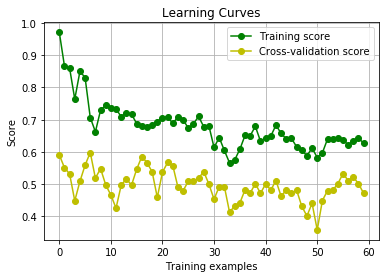

In [13]:
### Logistic Regression
estimator = LogisticRegression(solver='lbfgs')
draw_learning_curves(X2, y2, estimator, int(X2.shape[0]*0.6))
# 关于最后的61的说明
## 如果超过61会报警告，因为training的数据只有61个，会强制使用61
## 这里直接使用X2的60%计算了
## 原因是阶数要比数据点少（100个，60个训练，20个交叉验证，20个测试）
# draw_learning_curves(X, y, estimator,num_trainings)
# 按照官网的说明实际上是默认调用5 train_sizes=np.linspace(.1, 1.0, 5)
# 但是例子执行说少一个参数，可能和函数有关系，再研究
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html


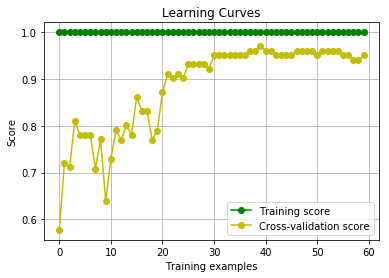

In [20]:
### Decision Tree
estimator = GradientBoostingClassifier()
draw_learning_curves(X2, y2, estimator, int(X2.shape[0]*0.6))

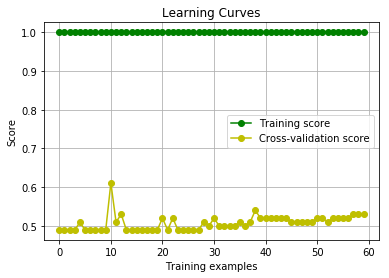

In [21]:
### Support Vector Machine
estimator = SVC(kernel='rbf', gamma=1000)
draw_learning_curves(X2, y2, estimator, int(X2.shape[0]*0.6))